### Задача 1

In [11]:
# Список
new_list = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

def sum_list(list):
    """Суммирование всех элементов списка"""
    n_sum = 0
    for i in list:
        n_sum += i
    return n_sum

In [13]:
def get_dis(list):
    """ Нахождение результата по формуле квадратичного отклонения """
    d_sum = 0
    result = 0
    # Нахождение среднего значения списка
    list_aver = sum_list(list) / len(list)
    for i in list:
        d_sum += (i - list_aver)**2
        # Результат - корень из полученного значения 
    return (d_sum / (len(list) - 1))**0.5
     
answ = get_dis(new_list)
print("Ответ: ", answ)

Ответ:  47.34795213553139


### Задача 2

Задача 2
Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении “усов” в boxplot, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.


In [65]:
# Для начала упорядочим список по возрастанию
def sort_list(list):
    i = 0
    a = 0
    while i < (len(list) - 1):
        if list[i+1] < list[i]:
            a = list[i]
            list[i] = list[i+1]
            list[i+1] = a
            i = 0
        else:
            i += 1
    return list
sorted_list = sort_list(new_list)
print([elem for elem in sorted_list])        

[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]


In [79]:
# Вычислим медиану
list_m = sorted_list[len(sorted_list) // 2]

# Вычислим нижний квантиль
def get_q1(list):
    list_q1 = [elem for elem in list if elem < list[len(list) // 2]]
    i = len(list_q1) // 2
    result = list_q1[i] 
    return result

# Вычислим верхний квантиль
def get_q3(list):
    list_q3 = [elem for elem in list if elem > list[len(list) // 2]]
    i = len(list_q3) // 2
    result = list_q3[i-1]
    return result

list_q1 = get_q1(sorted_list)
list_q3 = get_q3(sorted_list)
list_m, list_q1, list_q3

(70, 45, 84)

In [90]:
# Вычислим межквантильный диапазон
q_d = 1.5 * (list_q3 - list_q1)

# Найдем внутренние границы значений
x1 = list_q1 - q_n
x2 = list_q3 + q_n

q_d, x1, x2

(58.5, -26.25, 155.25)

In [91]:
# Выведем элементы, которые не входят во внутренние границы и количество
main_res = [elem for elem in new_list if (elem <= x1) or (elem >= x2)]
main_res, len(main_res)

([230], 1)

In [86]:
# Ответ не совпал, выполню проверку

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
np.quantile(sorted_list, 0.5), np.quantile(sorted_list, 0.25), np.quantile(sorted_list, 0.75)

(70.0, 45.0, 84.0)

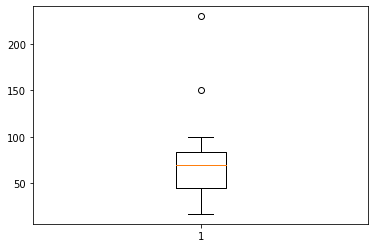

In [89]:
plt.boxplot(sorted_list)
plt.show()

In [92]:
# BoxPlot показывает два выброса, у меня получился один, значение 150 почему-то
# не захвачено, жду проверки :)

### Задача 3

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:

студент учится на факультете A,
студент учится на факультете B,
студент учится на факультете C?

In [9]:
# Вероятности для каждого факультета
A1 = 0.6
A2 = 0.7
A3 = 0.8

# количество учащихся в каждом факультете
A_n = 100
B_n = 90
C_n = 45

# общее количество учащихся
N = 100 + 90 + 45

# Вероятности для каждого факультета, что случайно выбранный студент именно с него
Xn_A = A_n / N
Xn_B = B_n / N
Xn_C = C_n / N
print(Xn_A, Xn_B, Xn_C)

0.425531914893617 0.3829787234042553 0.19148936170212766


In [10]:
# Так как наши вероятности зависимы, найдем искомую вероятность, перемножив их друг 
# на друга
P_a = round((Xn_A * A1) * 100, 2)
P_b = round((Xn_B * A2) * 100, 2)
P_c = round((Xn_C * A3) * 100, 2)
print(P_a, P_b, P_c)

25.53 26.81 15.32


#### Наиболее вероятно событие №2